<a href="https://colab.research.google.com/github/LoaiMB/AI_Workshop_Ar/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

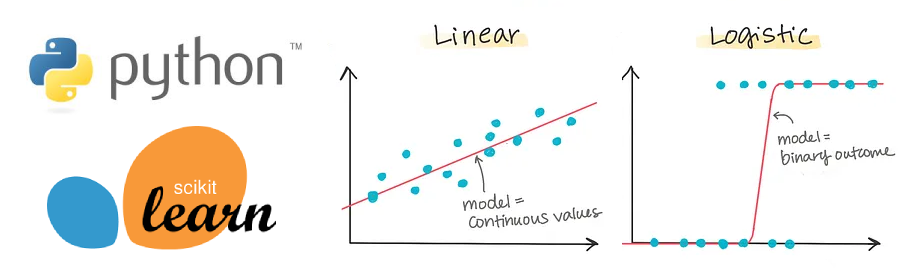

# **مقدمة**

## **1. Linear Regression with Gradient Descent**

## **تطبيق الخوارزمية**

In [ ]:
!pip install tqdm

In [ ]:
import numpy as np
from tqdm import tqdm

# Generate random data
np.random.seed(123)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Add a column of ones to X for the bias term
X_b = np.c_[np.ones((100, 1)), X]

# Gradient Descent variables
learning_rate = 0.1
n_iterations = 1000
m = len(y)

# Initialize theta (weights)
theta = np.random.randn(2, 1)

# List to store theta values after each iteration for visualization
theta_values = [theta.copy()]

# Gradient Descent
for iteration in tqdm(range(n_iterations)):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - learning_rate * gradients
    # Only store every 100th theta value to reduce number of plots
    if iteration % 100 == 0:
        theta_values.append(theta.copy())

# Final theta values
print("Theta found by gradient descent:", theta)

100%|██████████| 1000/1000 [00:00<00:00, 120108.36it/s]

Theta found by gradient descent: [[4.16994745]
 [2.86547676]]


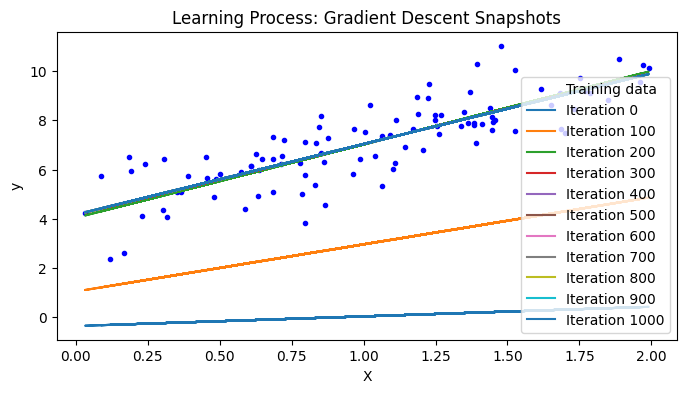

In [ ]:
import matplotlib.pyplot as plt

# Prepare for plotting
plt.figure(figsize=(8, 4))
plt.plot(X, y, "b.", label="Training data")

# Plot model predictions at different intervals
for i, theta in enumerate(theta_values):
    plt.plot(X, X_b.dot(theta), label=f"Iteration {i * 100}")

plt.xlabel("X")
plt.ylabel("y")
plt.title("Learning Process: Gradient Descent Snapshots")
plt.legend()
plt.show()

## **2. Polynomial Regression**

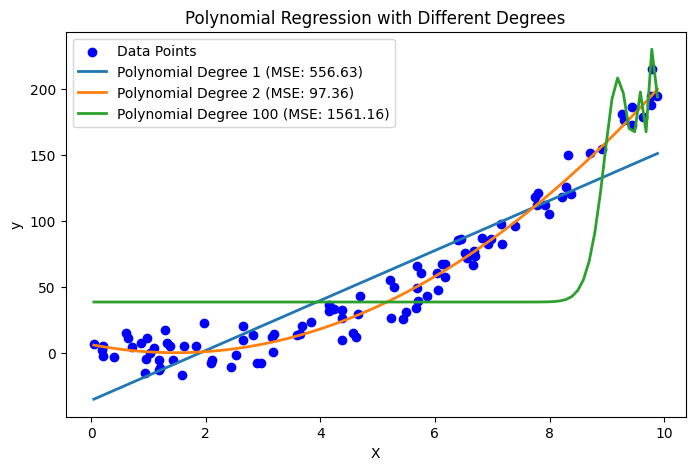

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

# Generate random data for demonstration
np.random.seed(0)
X = np.random.rand(100, 1) * 10  # Random values for X from 0 to 10
y = 3 * X**2 - 10 * X + 7 + np.random.randn(100, 1) * 10  # Quadratic relationship with noise

# Plot original data
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', label='Data Points')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Polynomial Regression with Different Degrees")

# Prepare a smooth range of X values for plotting
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)

# Lists to store models and their errors
degrees = [1, 2, 100]
mse_values = []

# Fit models and plot each one
for degree in degrees:
    # Polynomial Regression model with the specified degree
    poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    poly_model.fit(X, y)

    # Predict on both original and smooth range data
    y_pred = poly_model.predict(X)
    y_pred_smooth = poly_model.predict(X_range)

    # Calculate Mean Squared Error (MSE) for the model
    mse = mean_squared_error(y, y_pred)
    mse_values.append(mse)

    # Plot polynomial regression line on the smooth range
    plt.plot(X_range, y_pred_smooth, label=f'Polynomial Degree {degree} (MSE: {mse:.2f})', linewidth=2)

# Plot settings
plt.legend()
plt.show()

# **دراسة حالة التنبؤ بأسعار المنازل**

## **تحميل و تحليل البيانات**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

# Load dataset
housing = fetch_california_housing(as_frame=True)
print(housing.DESCR)
df = housing.frame

print(df.head())

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

## **Data Visualization**

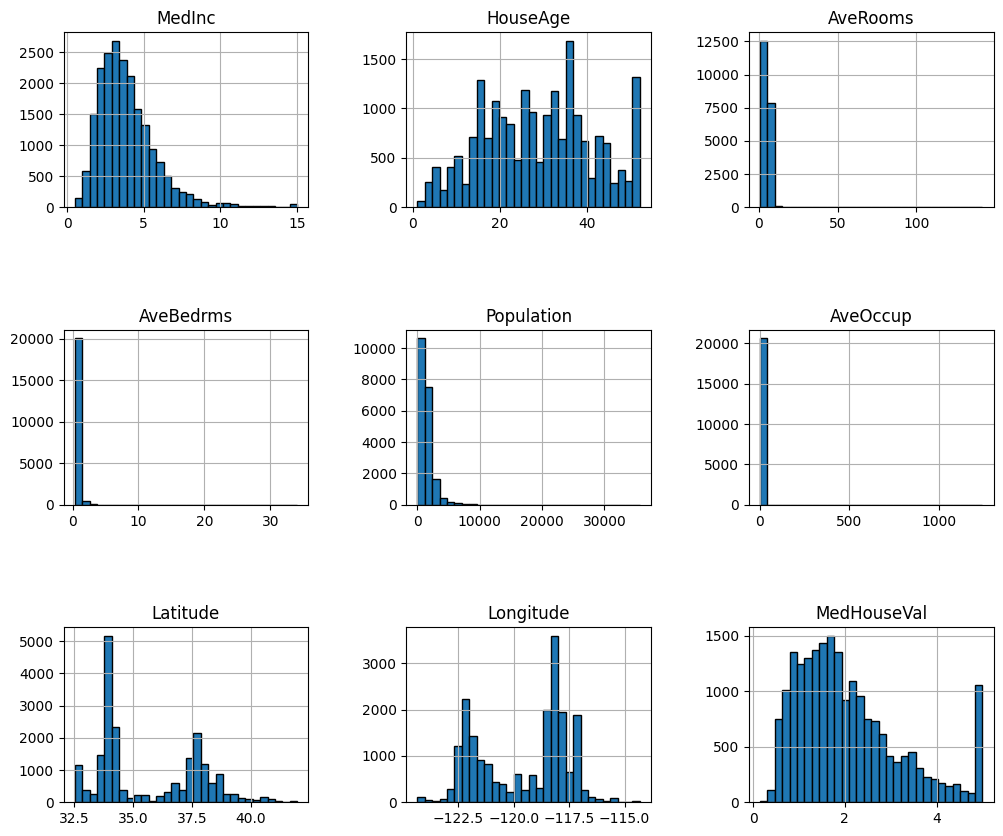

In [ ]:
import matplotlib.pyplot as plt

housing.frame.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

In [ ]:
features_of_interest = ["AveRooms", "AveBedrms", "AveOccup", "Population"]
housing.frame[features_of_interest].describe()

,AveRooms,AveBedrms,AveOccup,Population
count,20640.000000,20640.000000,20640.000000,20640.000000
mean,5.429000,1.096675,3.070655,1425.476744
std,2.474173,0.473911,10.386050,1132.462122
min,0.846154,0.333333,0.692308,3.000000
25%,4.440716,1.006079,2.429741,787.000000
50%,5.229129,1.048780,2.818116,1166.000000
75%,6.052381,1.099526,3.282261,1725.000000
max,141.909091,34.066667,1243.333333,35682.000000


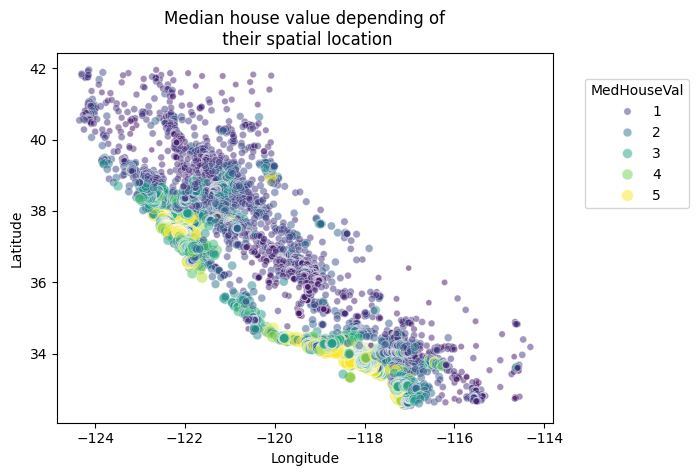

In [ ]:
import seaborn as sns

sns.scatterplot(
    data=housing.frame,
    x="Longitude",
    y="Latitude",
    size="MedHouseVal",
    hue="MedHouseVal",
    palette="viridis",
    alpha=0.5,
)
plt.legend(title="MedHouseVal", bbox_to_anchor=(1.05, 0.95), loc="upper left")
_ = plt.title("Median house value depending of\n their spatial location")

## **Data split and normalization**


In [ ]:
# Define features (all) and target
drop_ls = ["MedHouseVal","AveRooms","AveBedrms","Population","AveOccup"]
X = df.drop(columns = drop_ls).values
y = df["MedHouseVal"].values.reshape(-1, 1)


# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
X_train_mean, X_train_std = X_train.mean(axis=0), X_train.std(axis=0)
X_train = (X_train - X_train_mean) / X_train_std
X_val = (X_val - X_train_mean) / X_train_std


## **1. Linear Regression with Gradient Descent**

In [ ]:
# Gradient Descent settings
learning_rate = 0.01
n_iterations = 5000
m = len(y_train)

# Initialize weights
np.random.seed(42)
theta_lin = np.random.randn(X_train.shape[1], 1)

# Lists to store loss values
train_losses = []
val_losses = []

# Gradient Descent with Early Stopping
for iteration in range(n_iterations):
    # Compute predictions and cost
    y_train_pred = X_train.dot(theta_lin)
    train_loss = np.mean((y_train_pred - y_train) ** 2) / 2
    y_val_pred = X_val.dot(theta_lin)
    val_loss = np.mean((y_val_pred - y_val) ** 2) / 2

    # Save losses
    train_losses.append(train_loss)
    val_losses.append(val_loss)

    # Update theta
    gradients = 2/m * X_train.T.dot(X_train.dot(theta_lin) - y_train)
    theta_lin = theta_lin - learning_rate * gradients

print(theta_lin)

[[ 0.72610486]
 [ 0.1218865 ]
 [-0.94000635]
 [-0.89762711]]


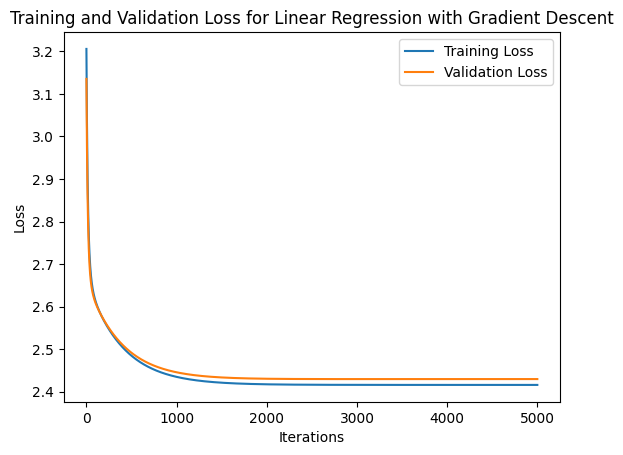

In [ ]:
import matplotlib.pyplot as plt

plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Training and Validation Loss for Linear Regression with Gradient Descent")
plt.legend()
plt.show()

## **2.Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Binary target for logistic regression
X_log = df[["MedInc", "HouseAge"]]
y_binary = (df["MedHouseVal"] > df["MedHouseVal"].median()).astype(int)

# Split data
X_train_log, X_val_log, y_train_log, y_val_log = train_test_split(X_log, y_binary, test_size=0.2, random_state=42)

# Normalize features
X_train_mean, X_train_std = X_train.mean(axis=0), X_train.std(axis=0)
X_train = (X_train - X_train_mean) / X_train_std
X_val = (X_val - X_train_mean) / X_train_std

# Train Logistic Regression with early stopping
log_reg = LogisticRegression()  # warm_start allows for iterative training
train_acc, val_acc = [], []

log_reg.fit(X_train_log, y_train_log)

train_acc = log_reg.score(X_train_log, y_train_log)
val_acc = log_reg.score(X_val_log, y_val_log)


# Final accuracy scores
print(f"Final Training Accuracy: {train_acc}")
print(f"Final Validation Accuracy: {val_acc}")


Final Training Accuracy: 0.7613250968992248
Final Validation Accuracy: 0.7606589147286822


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


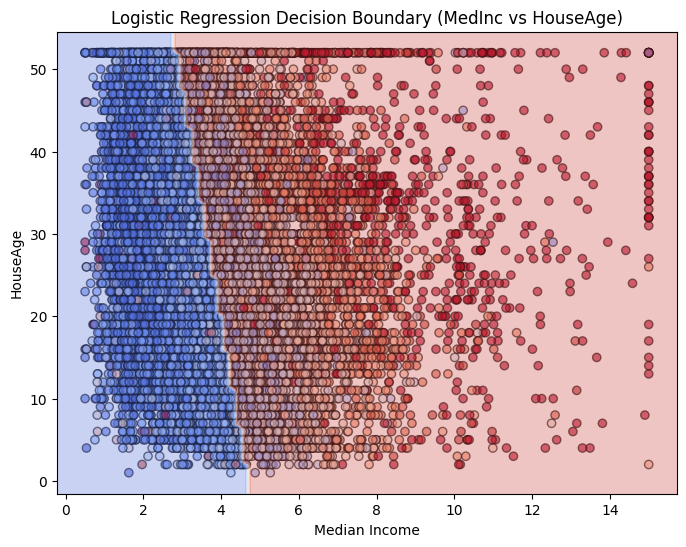

In [ ]:
# Plot decision boundary in 2D using MedInc and AveRooms features only for simplicity
plt.figure(figsize=(8, 6))
plt.scatter(df["MedInc"], df["HouseAge"], c=df["MedHouseVal"], cmap="coolwarm", edgecolors="k", alpha=0.6)
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
xx, yy = np.meshgrid(np.linspace(xmin, xmax, 100), np.linspace(ymin, ymax, 100))
Z = log_reg.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
plt.xlabel("Median Income")
plt.ylabel("HouseAge")
plt.title("Logistic Regression Decision Boundary (MedInc vs HouseAge)")
plt.show()